In [1]:
!nvidia-smi

Thu Nov 21 08:59:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11m.pt')

100%|██████████| 38.8M/38.8M [00:00<00:00, 87.0MB/s]


In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qY9yXqo4eLVy5kiXoWek")
project = rf.workspace("seher-pvagg").project("dangerous-2orbe")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dangerous-2 in yolov11:: 100%|██████████| 18862/18862 [00:03<00:00, 5578.72it/s]


In [7]:
%cd /content

# Eğitim başlatma
!yolo task=detect mode=train model=yolo11m.pt data=/content/dangerous-2/data.yaml epochs=15 imgsz=640 plots=True save=True &

/content
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/dangerous-2/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

In [8]:
!ls /content/runs/detect/train/

args.yaml  weights


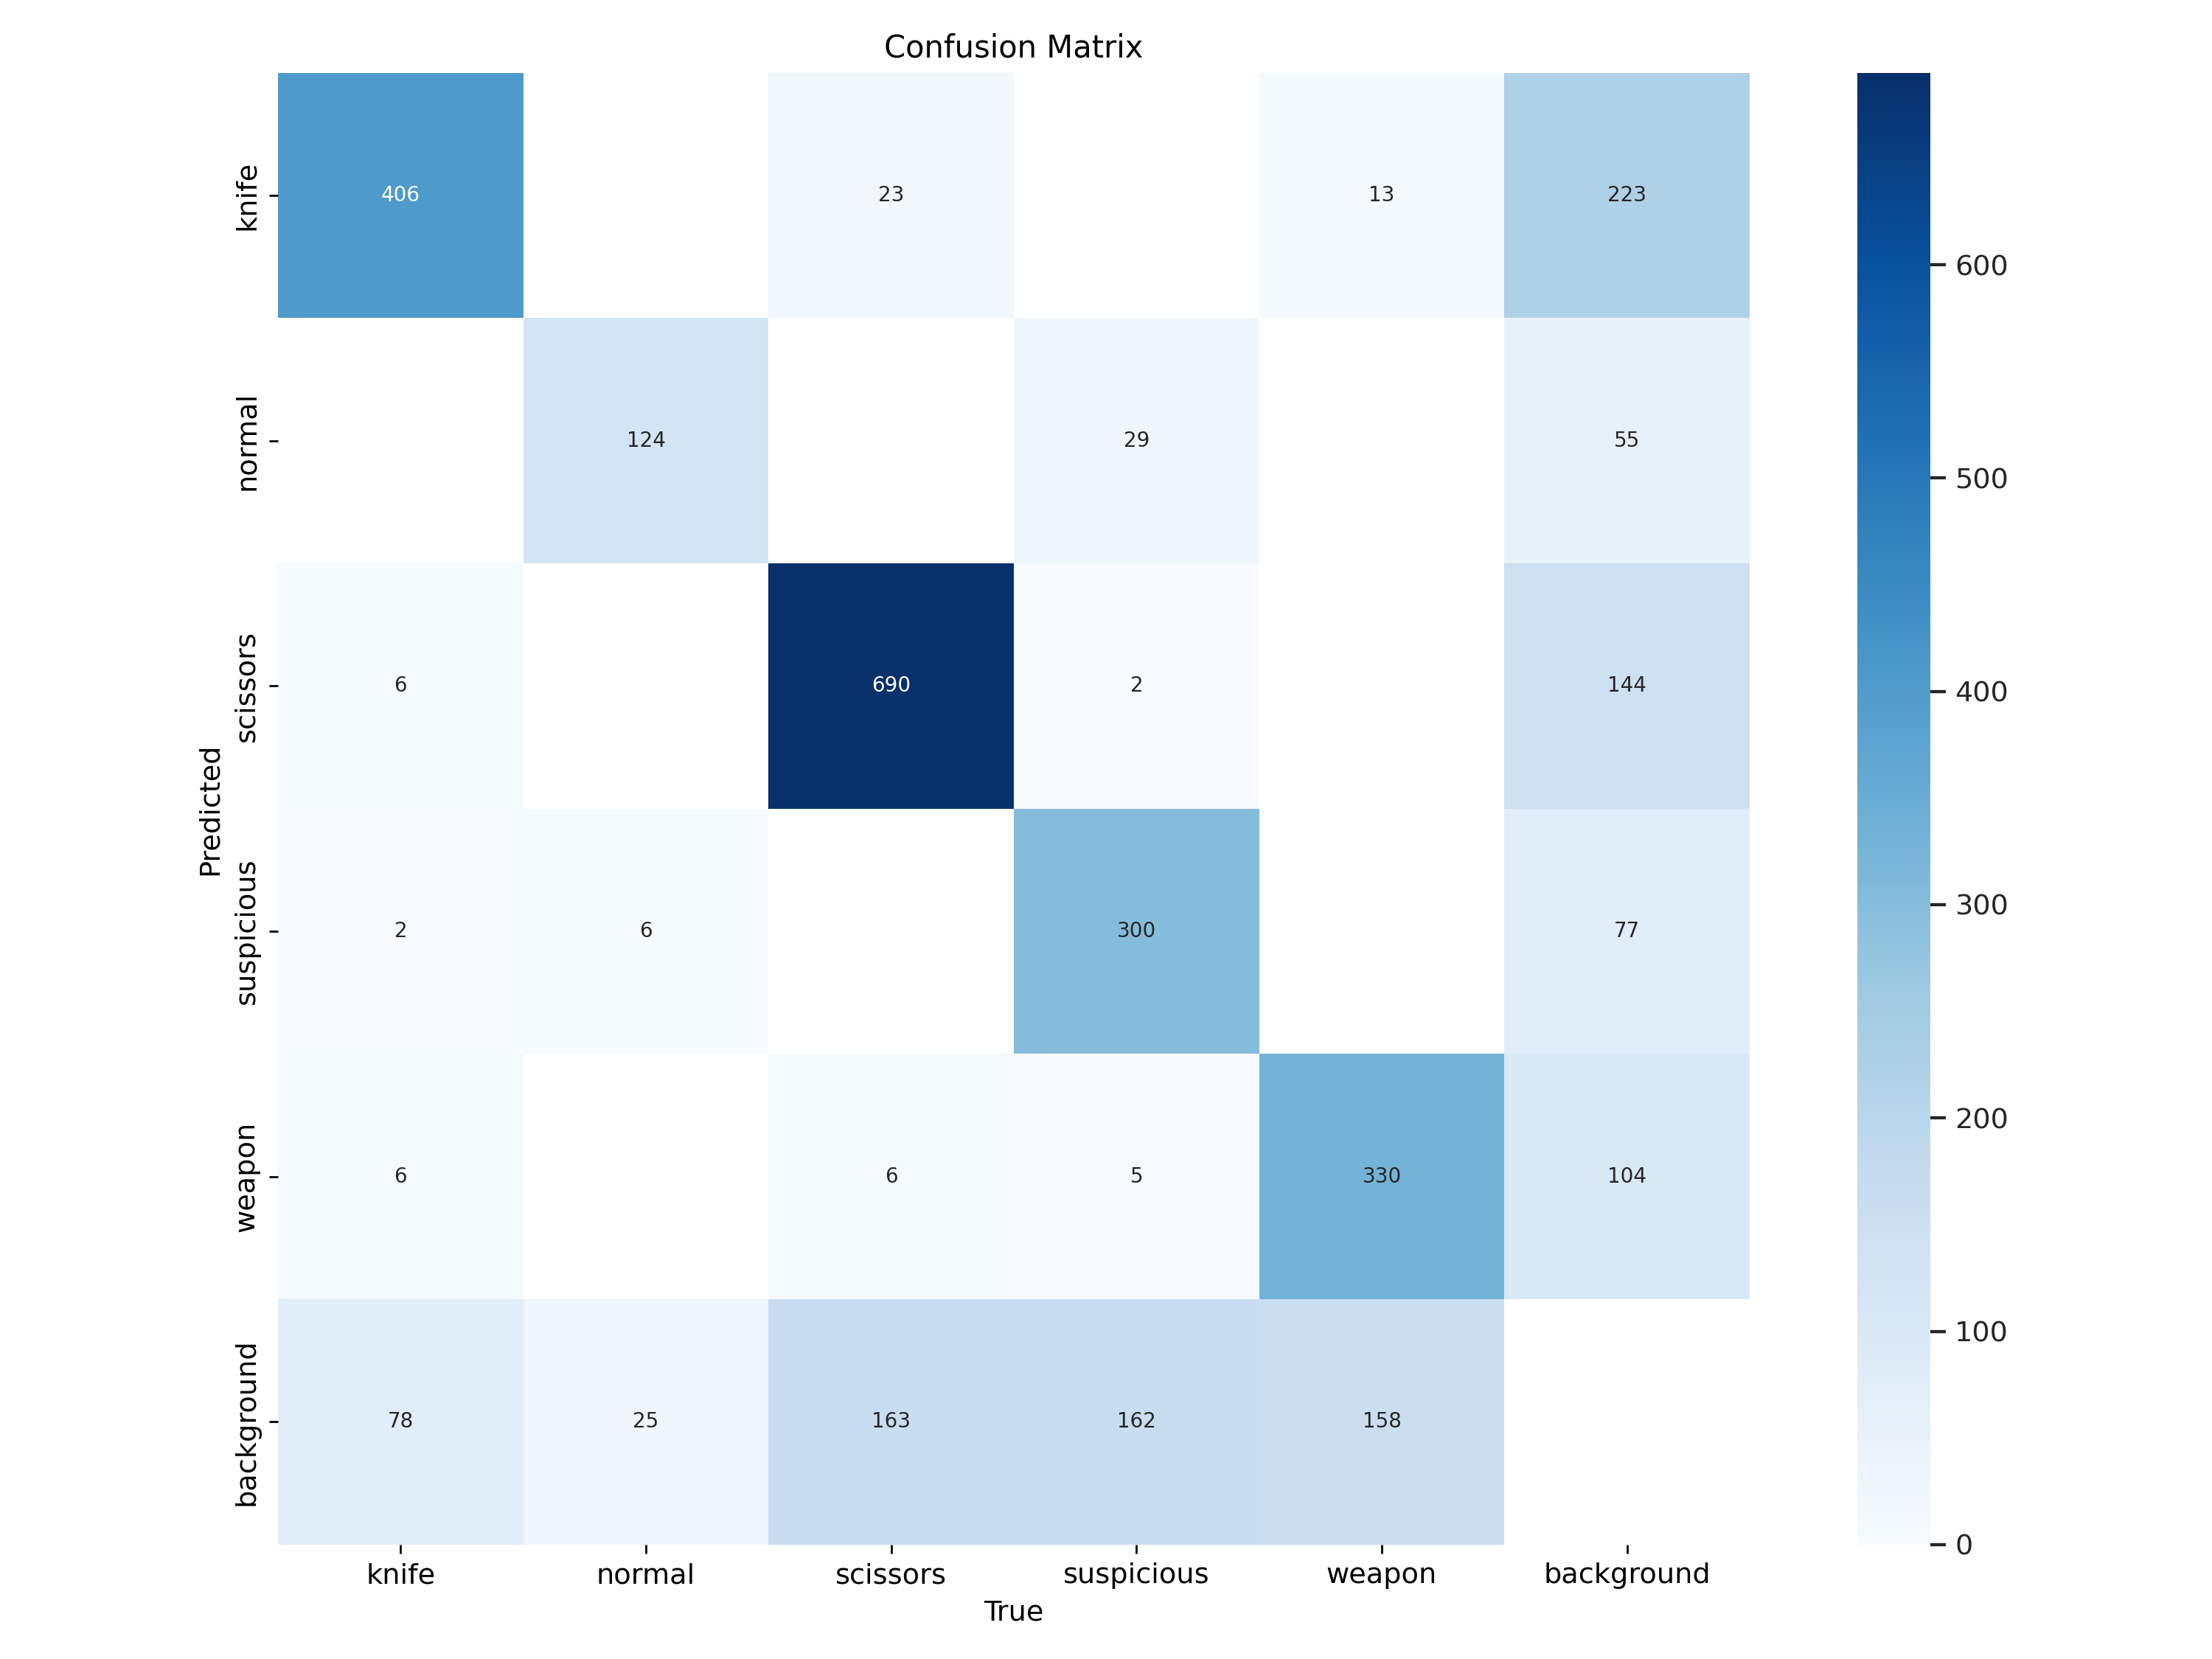

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=600)

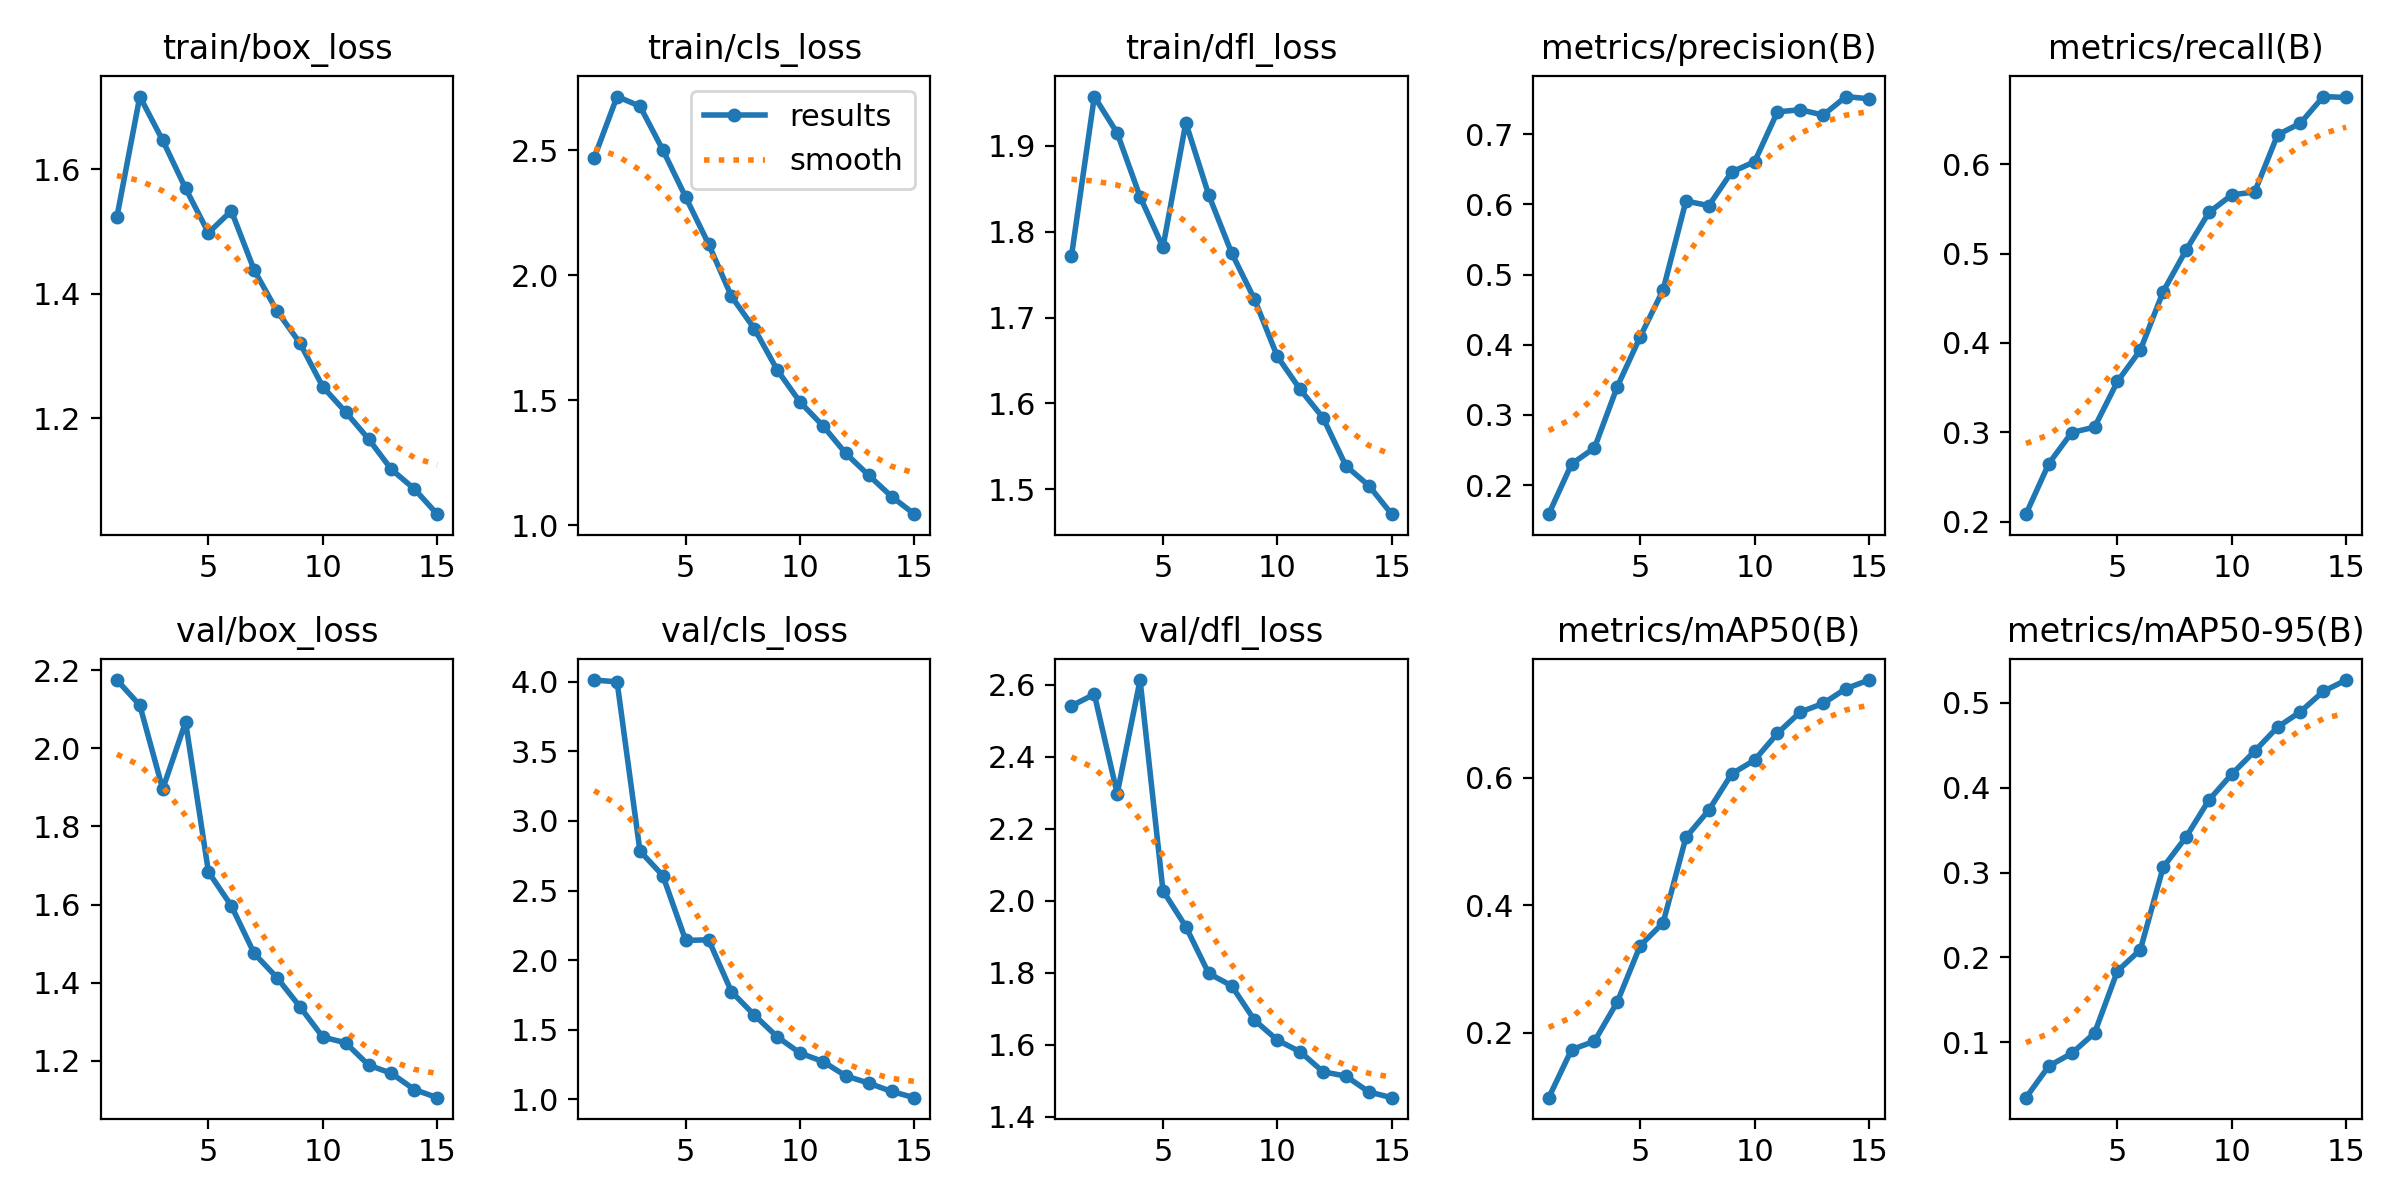

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/runs/detect/train2/results.png', width=600)

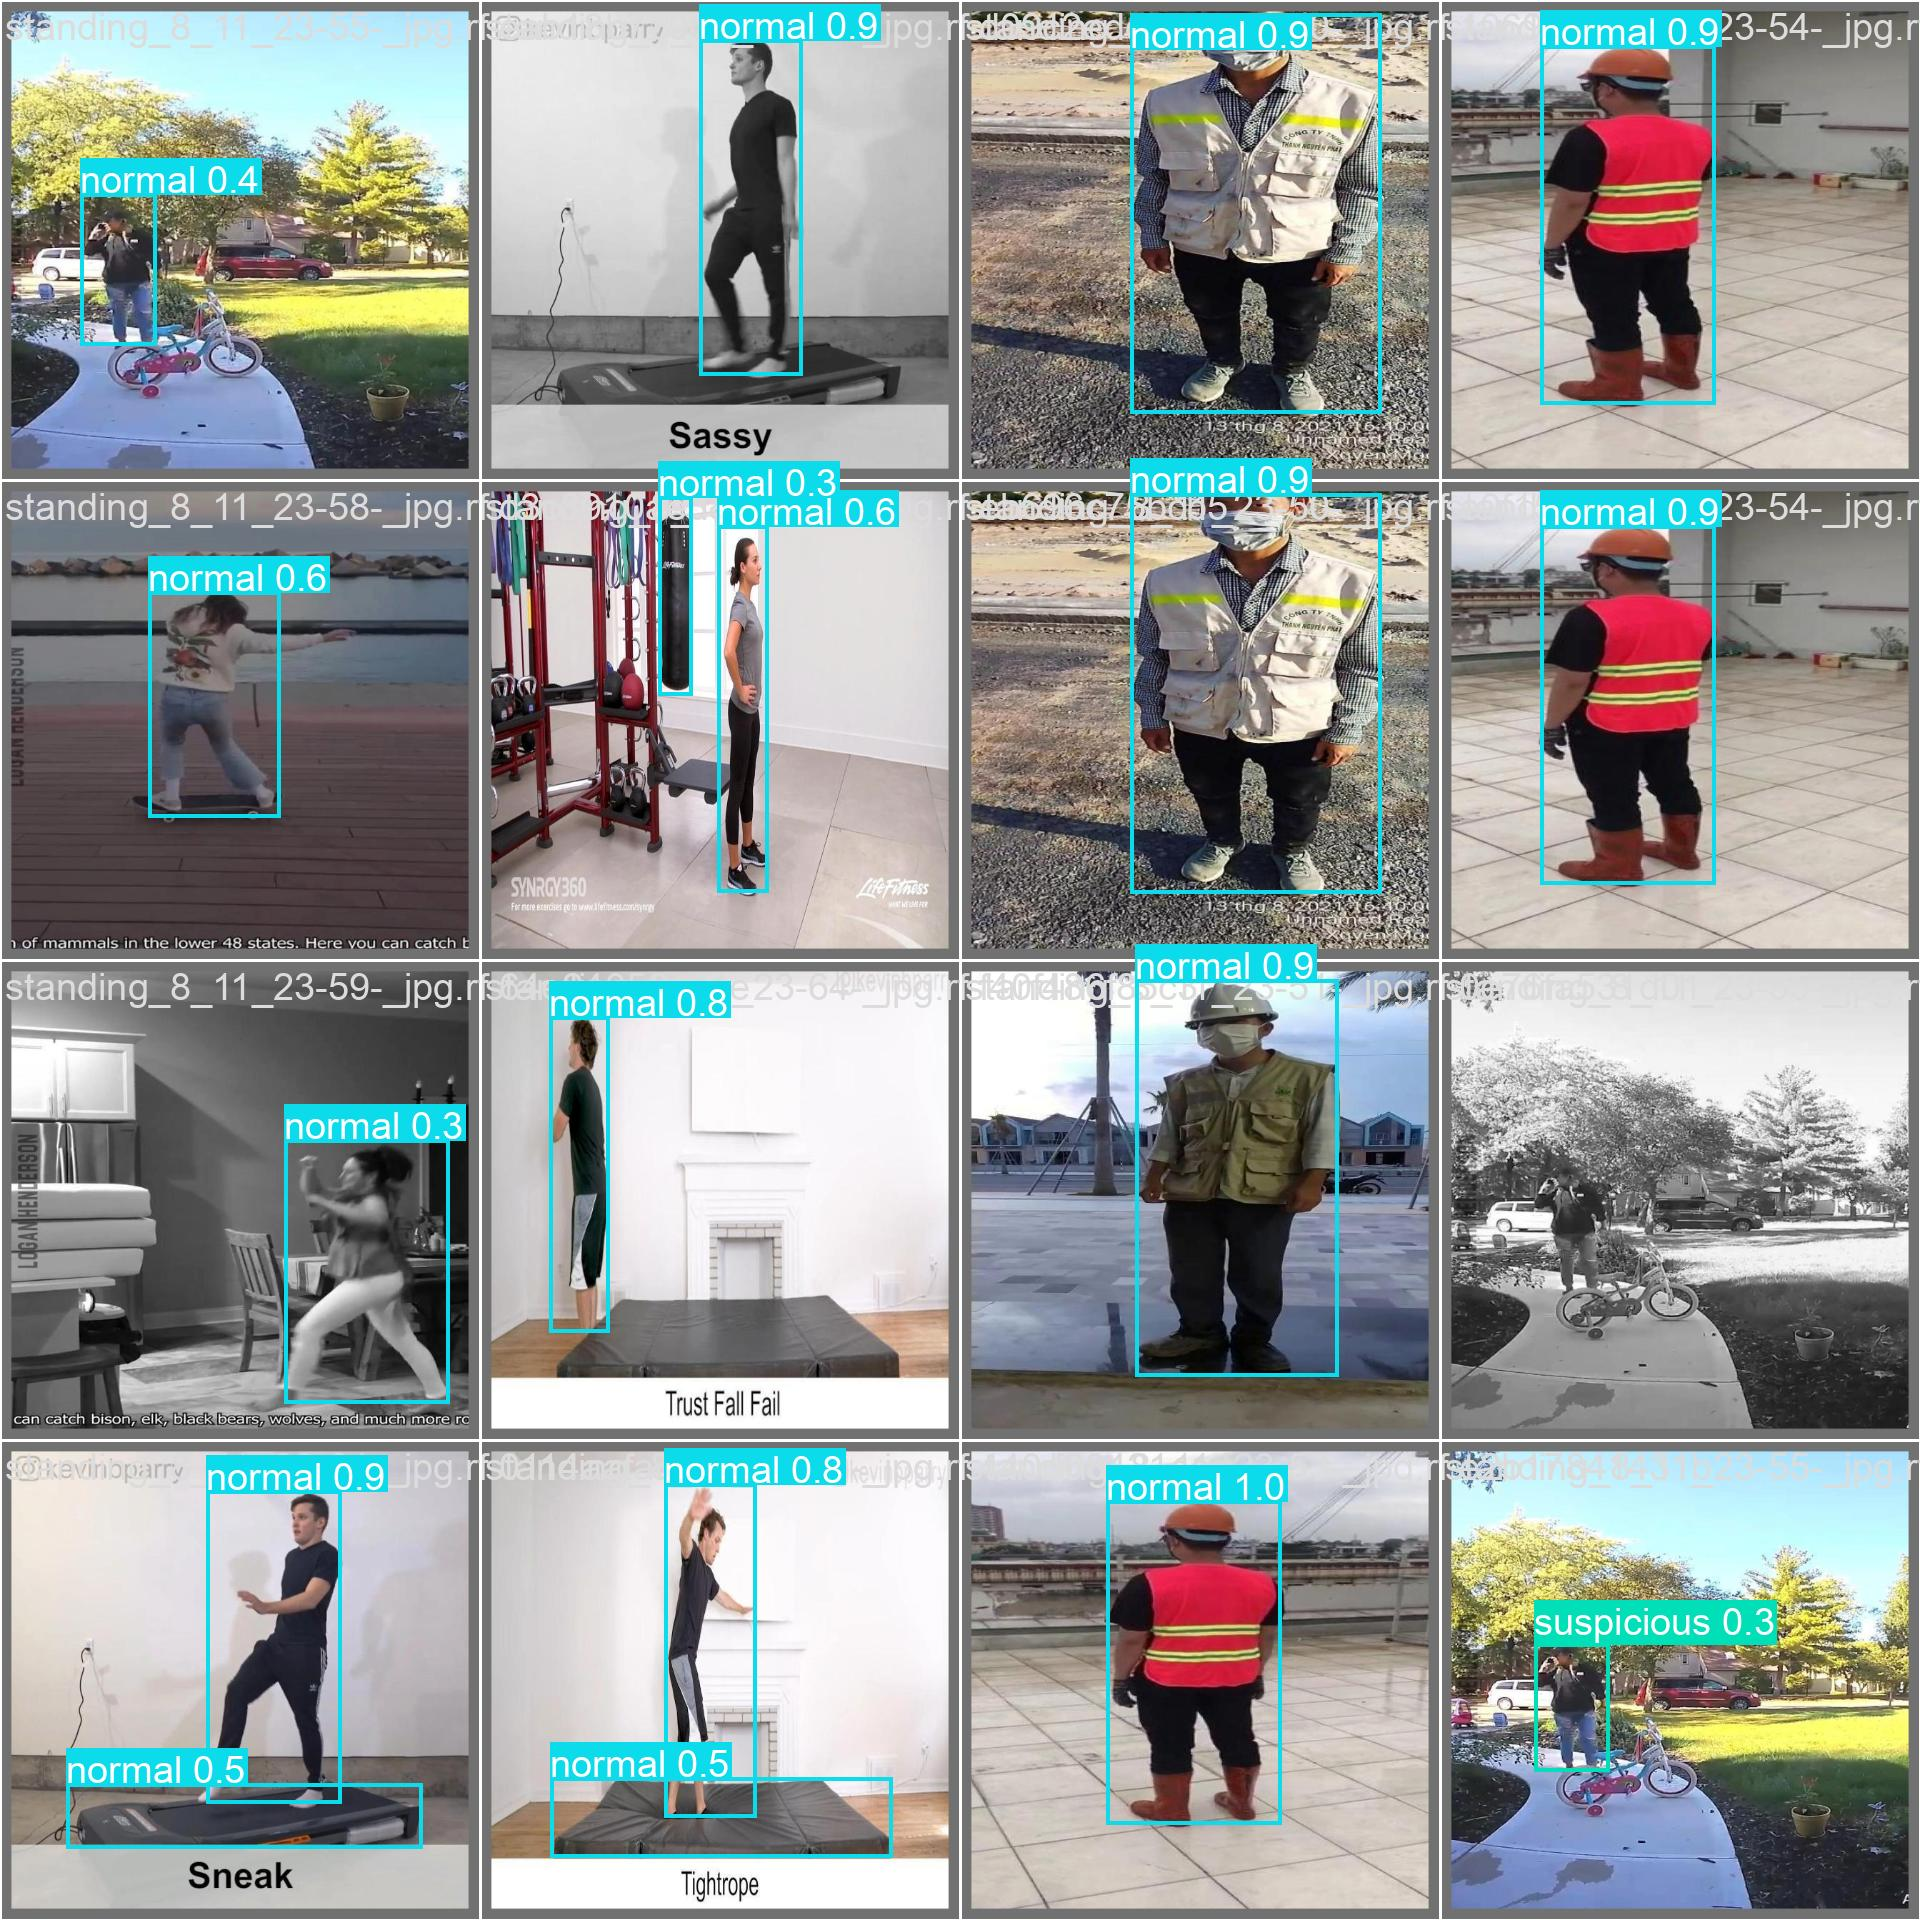

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [12]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,033,887 parameters, 0 gradients, 67.7 GFLOPs
val: Scanning /content/dangerous-2/valid/labels.cache... 1805 images, 0 backgrounds, 0 corrupt: 100% 1805/1805 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 43, len(boxes) = 2534. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 113/113 [00:51<00:00,  2.19it/s]
                   all       1805       2534      0.751      0.675      0.754      0.527
                 knife        390        498      0.704      0.737       0.78      0.573
                normal        123        155       0.62      0.761       0.75      0.493
              scissors        651     

In [13]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,033,887 parameters, 0 gradients, 67.7 GFLOPs

image 1/742 /content/dangerous-2/test/images/-1-771x514_jpg.rf.280e66318180b54f4bbc0b280e0cf890.jpg: 640x640 2 normals, 36.9ms
image 2/742 /content/dangerous-2/test/images/-1-771x514_jpg.rf.fe86b074a3ce20e897b7770c202523c7.jpg: 640x640 2 normals, 36.9ms
image 3/742 /content/dangerous-2/test/images/-11-_jpg.rf.51cf3c66222c973325361b2a7a1e9bbb.jpg: 640x640 1 normal, 36.8ms
image 4/742 /content/dangerous-2/test/images/-Brass-Handle-Mike-Irie-Hand-Ground-Mirror-Polish___89292-1707160096-500-750_jpg.rf.a535e062a4dd4fe3cd171b088af06725.jpg: 640x640 1 knife, 36.8ms
image 5/742 /content/dangerous-2/test/images/-_-_jpg.rf.0af1bcb92cec27af952b0af8c0522ac0.jpg: 640x640 1 knife, 36.8ms
image 6/742 /content/dangerous-2/test/images/-_-_jpg.rf.21ac75ed210fc21c4bcab5a0b6928785.jpg: 640x640 6 knifes, 36.8ms
image 7/742 /content/dangerous

In [22]:
import shutil
import os

best_model_path = '/content/runs/detect/train2/weights/best.pt'
last_model_path = '/content/runs/detect/train2/weights/last.pt'

save_path = '/content/drive/MyDrive/yolo_v11_models/'
os.makedirs(save_path, exist_ok=True)

shutil.copy(best_model_path, os.path.join(save_path, 'yolo_model_best.pt'))
shutil.copy(last_model_path, os.path.join(save_path, 'yolo_model_last.pt'))

print("Model başarıyla kaydedildi!")

Model başarıyla kaydedildi!
